In [69]:
import pandas as pd
import numpy as np
import os
import xml.etree.ElementTree as ET
from PIL import Image 
import matplotlib.pyplot as plt

# Extracting Features From the XML file

In [25]:
tree = ET.parse('competition-dataset/xml/reg/eu-001-reg.xml')
root = tree.getroot()

In [26]:
t=[]
for table in root.iter('table'):
    t.append(table.attrib)
    o=pd.DataFrame(t)

In [27]:
o

id
0  1
1  2
2  3
3  4
4  5
5  6
6  7

In [28]:
r=[]
for region in root.iter('region'):
    r.append(region.attrib)
    y=pd.DataFrame(t)
y

id
0  1
1  2
2  3
3  4
4  5
5  6
6  7

In [29]:
b=[]
for bounding_box in root.iter('bounding-box'):
    b.append(bounding_box.attrib)
    n=pd.DataFrame(b)

In [30]:
n

x1   x2   y1   y2
0  100  482  451  543
1  101  483  243  415
2  102  476   95  207
3  102  480  482  747
4  101  483  201  446
5  103  484  494  747
6  105  479  347  449

In [31]:
def extractor(filename):

    tree = ET.parse('competition-dataset/xml/reg/' + filename)
    root = tree.getroot()
    data=pd.DataFrame()
    tab=[]
    reg=[]
    bbox=[]
    img_id=[]
    
    for table in root.iter('table'):
        tab.append(table.attrib)
        table_id=pd.DataFrame(tab)
        
    for region in root.iter('region'):
        reg.append(region.attrib)
        img_id.append(filename.split('-')[0]+'-'+filename.split('-')[1] +'-'+ region.attrib['page'])
        region_page=pd.DataFrame(reg) 
        #img_id=pd.DataFrame(img_id) 
        
    for bounding_box in root.iter('bounding-box'):
        bbox.append(bounding_box.attrib)
        bound_box=pd.DataFrame(bbox)
    
    #data['image_id']=img_id
    img_id= pd.Series(img_id)
    img_id={'Image_id':img_id}
    img_id=pd.DataFrame(img_id)
    
    
    data=pd.concat([img_id,table_id, region_page, bound_box],axis=1)
   #filename.split('-')[0]+'-'+filename.split('-')[1] +'-'+ 'page'+'-'
    
    return data

In [32]:
data=extractor('eu-001-reg.xml')  

In [33]:
data

Image_id id id page   x1   x2   y1   y2
0  eu-001-1  1  1    1  100  482  451  543
1  eu-001-1  2  1    1  101  483  243  415
2  eu-001-1  3  1    1  102  476   95  207
3  eu-001-2  4  1    2  102  480  482  747
4  eu-001-2  5  1    2  101  483  201  446
5  eu-001-3  6  1    3  103  484  494  747
6  eu-001-3  7  1    3  105  479  347  449

In [57]:
frames=[]
for file in os.listdir('competition-dataset/xml/reg/'):
    df = extractor(file)
    frames.append(df)
Data=pd.concat(frames,ignore_index=True)
    
    

In [58]:
Data.head(7)

Image_id id id page   x1   x2   y1   y2
0  eu-001-1  1  1    1  100  482  451  543
1  eu-001-1  2  1    1  101  483  243  415
2  eu-001-1  3  1    1  102  476   95  207
3  eu-001-2  4  1    2  102  480  482  747
4  eu-001-2  5  1    2  101  483  201  446
5  eu-001-3  6  1    3  103  484  494  747
6  eu-001-3  7  1    3  105  479  347  449

In [62]:
import glob, os, shutil
data = pd.Series(Data['Image_id'].unique())
data= 'D:/competition-dataset/jpgs/' + data + '.jpg'

In [24]:
source_dir ='competition-dataset/jpgs/'
dest_dir = 'competition-dataset/data/'
file = glob.iglob(os.path.join(source_dir, "*.jpg"))
for f in data:
    if os.path.isfile(f):
        shutil.copy2(f, dest_dir)

In [59]:
img_id=pd.Series(Data['Image_id']) + '.jpg'
data1= os.listdir('competition-dataset/data/')
index=[]
for i,k in enumerate(img_id):
    if not k in data1:
        index.append(i)

In [60]:
index

[37, 93, 94, 145, 155, 156, 157, 158, 159]

In [61]:
Data.drop(Data.index[index],inplace=True)
Data = Data.reset_index(drop=True)
Data.head(10)

Image_id id id page   x1   x2   y1   y2
0  eu-001-1  1  1    1  100  482  451  543
1  eu-001-1  2  1    1  101  483  243  415
2  eu-001-1  3  1    1  102  476   95  207
3  eu-001-2  4  1    2  102  480  482  747
4  eu-001-2  5  1    2  101  483  201  446
5  eu-001-3  6  1    3  103  484  494  747
6  eu-001-3  7  1    3  105  479  347  449
7  eu-002-1  1  1    1  124  507  499  630
8  eu-003-1  1  1    1   92  519  564  651
9  eu-003-1  2  1    1   92  519  407  529

# Document Images(converted from pdf)

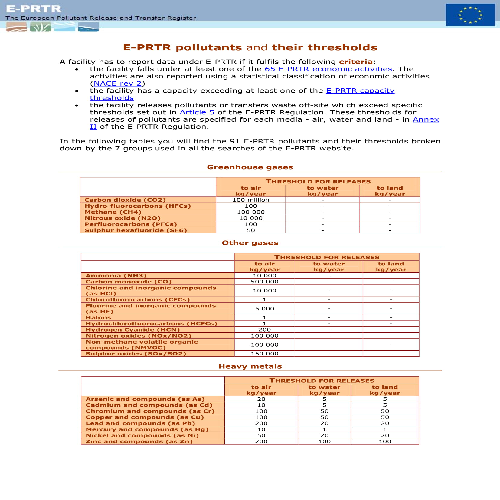

In [70]:
width = 500
height = 500
im=Image.open('competition-dataset/data/eu-001-1.jpg')
im.resize((width, height), Image.NEAREST)

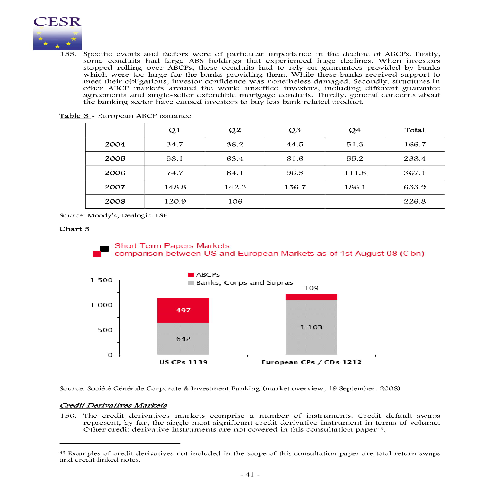

In [71]:
width = 500
height = 500
im=Image.open('competition-dataset/data/eu-002-1.jpg')
im.resize((width, height), Image.NEAREST)

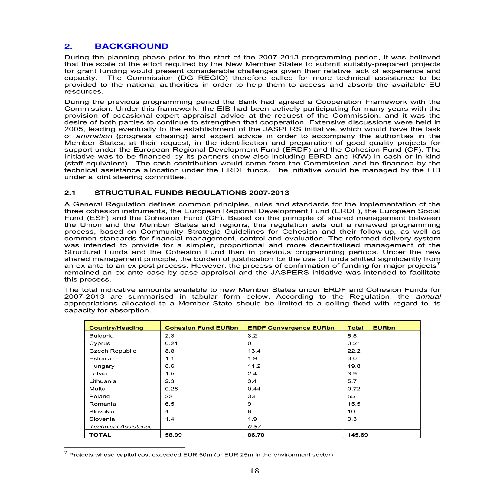

In [72]:
width = 500
height = 500
im=Image.open('competition-dataset/data/eu-008-1.jpg')
im.resize((width, height), Image.NEAREST)

# Converting  extracted bounding box  to the darknet format

In [80]:
bbox=[]
for i in range(len(Data)):
    bbox.append([int(Data['x1'][i]),int(Data['y1'][i]),int(Data['x2'][i]),int(Data['y2'][i])])

In [109]:
bbox[2]

[102, 95, 476, 207]

In [79]:
def convert(size, box):
        dw = 1./size[0]
        dh = 1./size[1]
        x = (box[0] + box[2])/2.0
        y = (box[1] + box[3])/2.0
        w = box[2] - box[0]
        h = box[3] - box[1]
        x = x*dw
        w = w*dw
        y = y*dh
        h = h*dh
        return x,y,w,h

In [77]:
path_= 'D:/competition-dataset/data/'

In [84]:
ann=[]
for i,j in zip(img_id,bbox):
    path= path_ + i + '.jpg'
    im = Image.open(path)
    size = im.size
    ann.append(convert(size,j))
anns =  []
for i in ann:
    i = ' '.join(map(str,i))
    j=  '0' + ' ' + i
    anns.append(j)
    

In [85]:
anns[0]

'0 0.17604355716878403 0.21248396750748183 0.2310949788263763 0.039333048311244116'

In [86]:
anns_dic={}
for i,k in zip(img_id,anns):
    if i in anns_dic:
        anns_dic[i].append(k)
    else:
         anns_dic[i] =[k]
for i,k in anns_dic.items():
    with open(i + '.txt','w+') as f:
        for line in k:
            f.write(line)
            f.write('\n')
    f.close()
   
    

In [91]:
path='data/obj/'
with open('train_table.txt','w+') as file:
    for i in img_id.unique()[:100]:
        file.write(path + i + '.jpg')
        file.write('\n')
file.close()

In [93]:
path='data/obj/'
with open('test_table.txt','w+') as file:
    for i in img_id.unique()[100:]:
        file.write(path + i + '.jpg')
        file.write('\n')
file.close()

In [74]:
from IPython.display import Image

# Training on darknet YOLOV3 

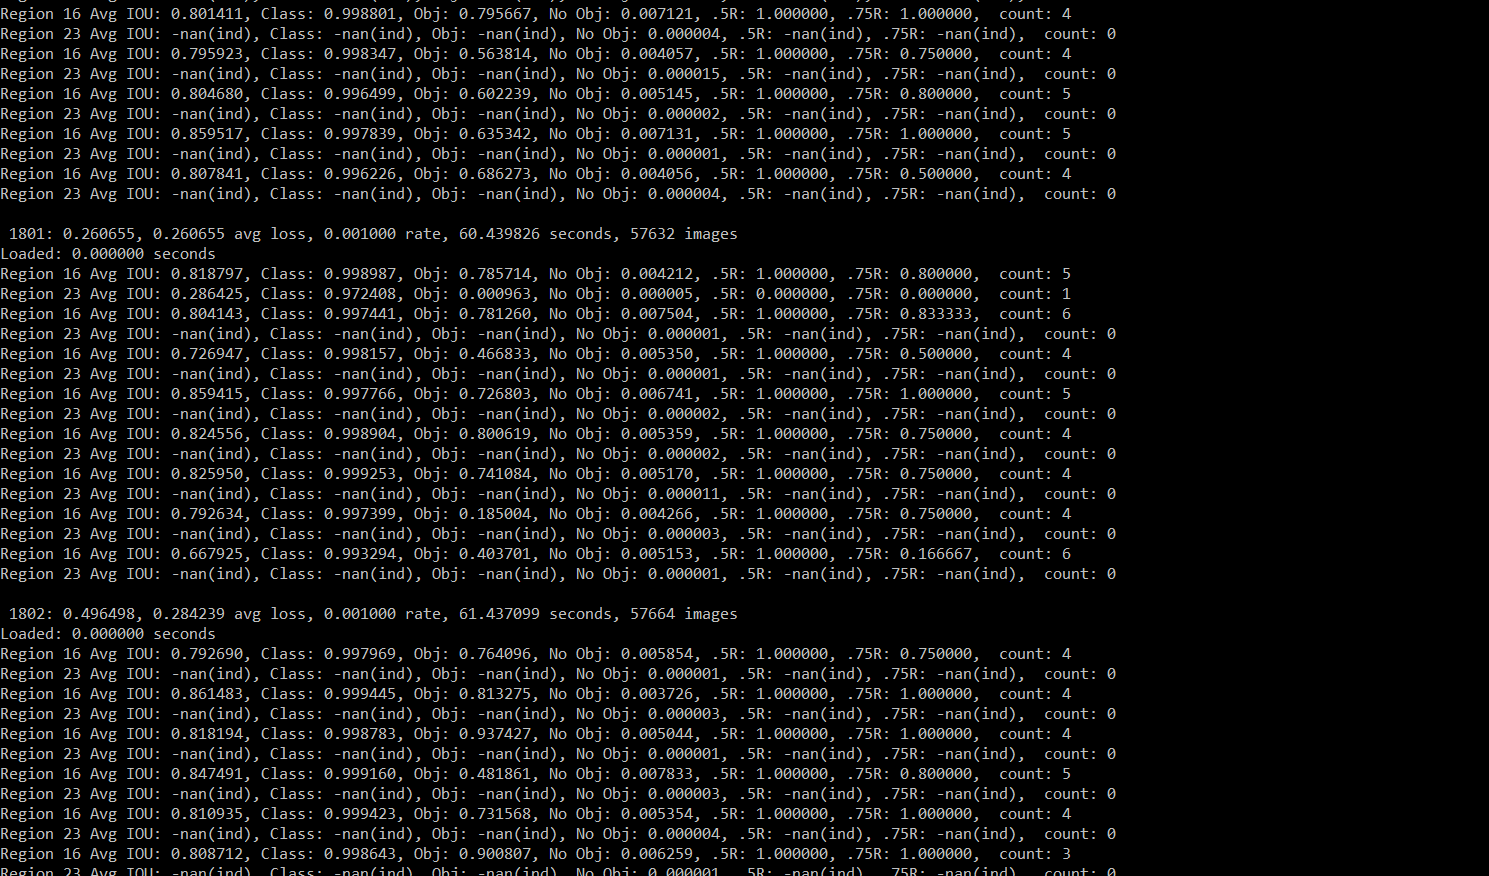

In [75]:
Image('train.png')

# Predicition on Test Images

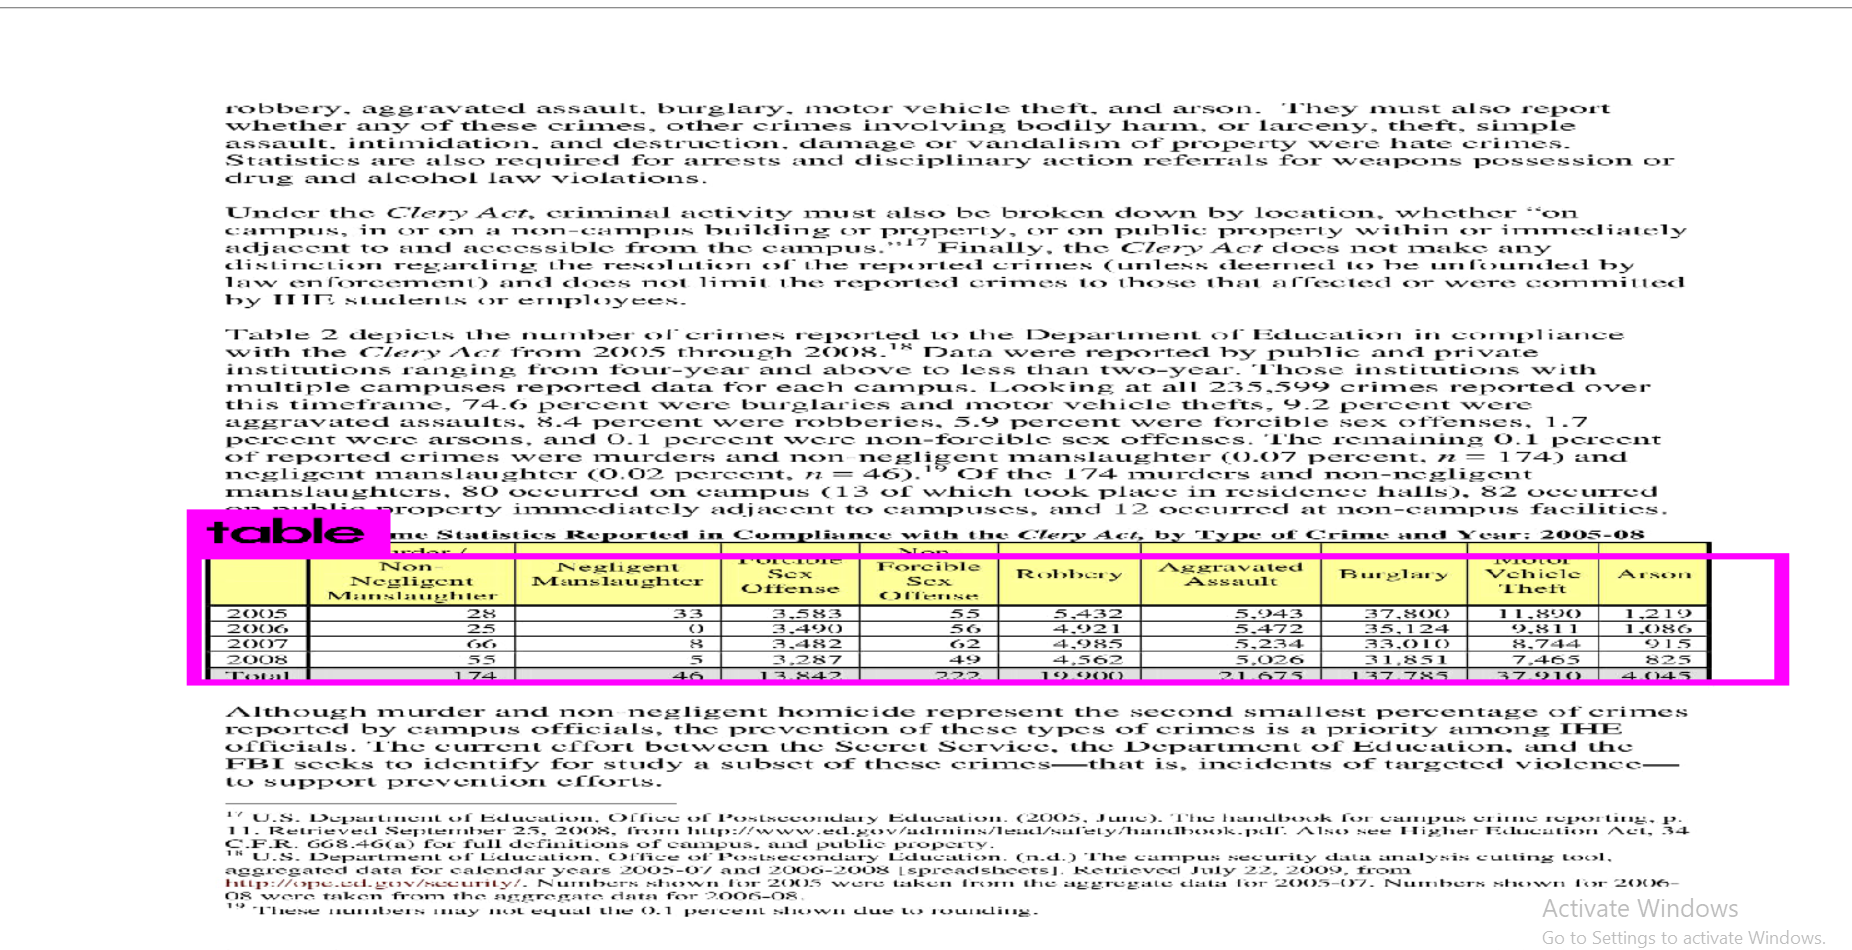

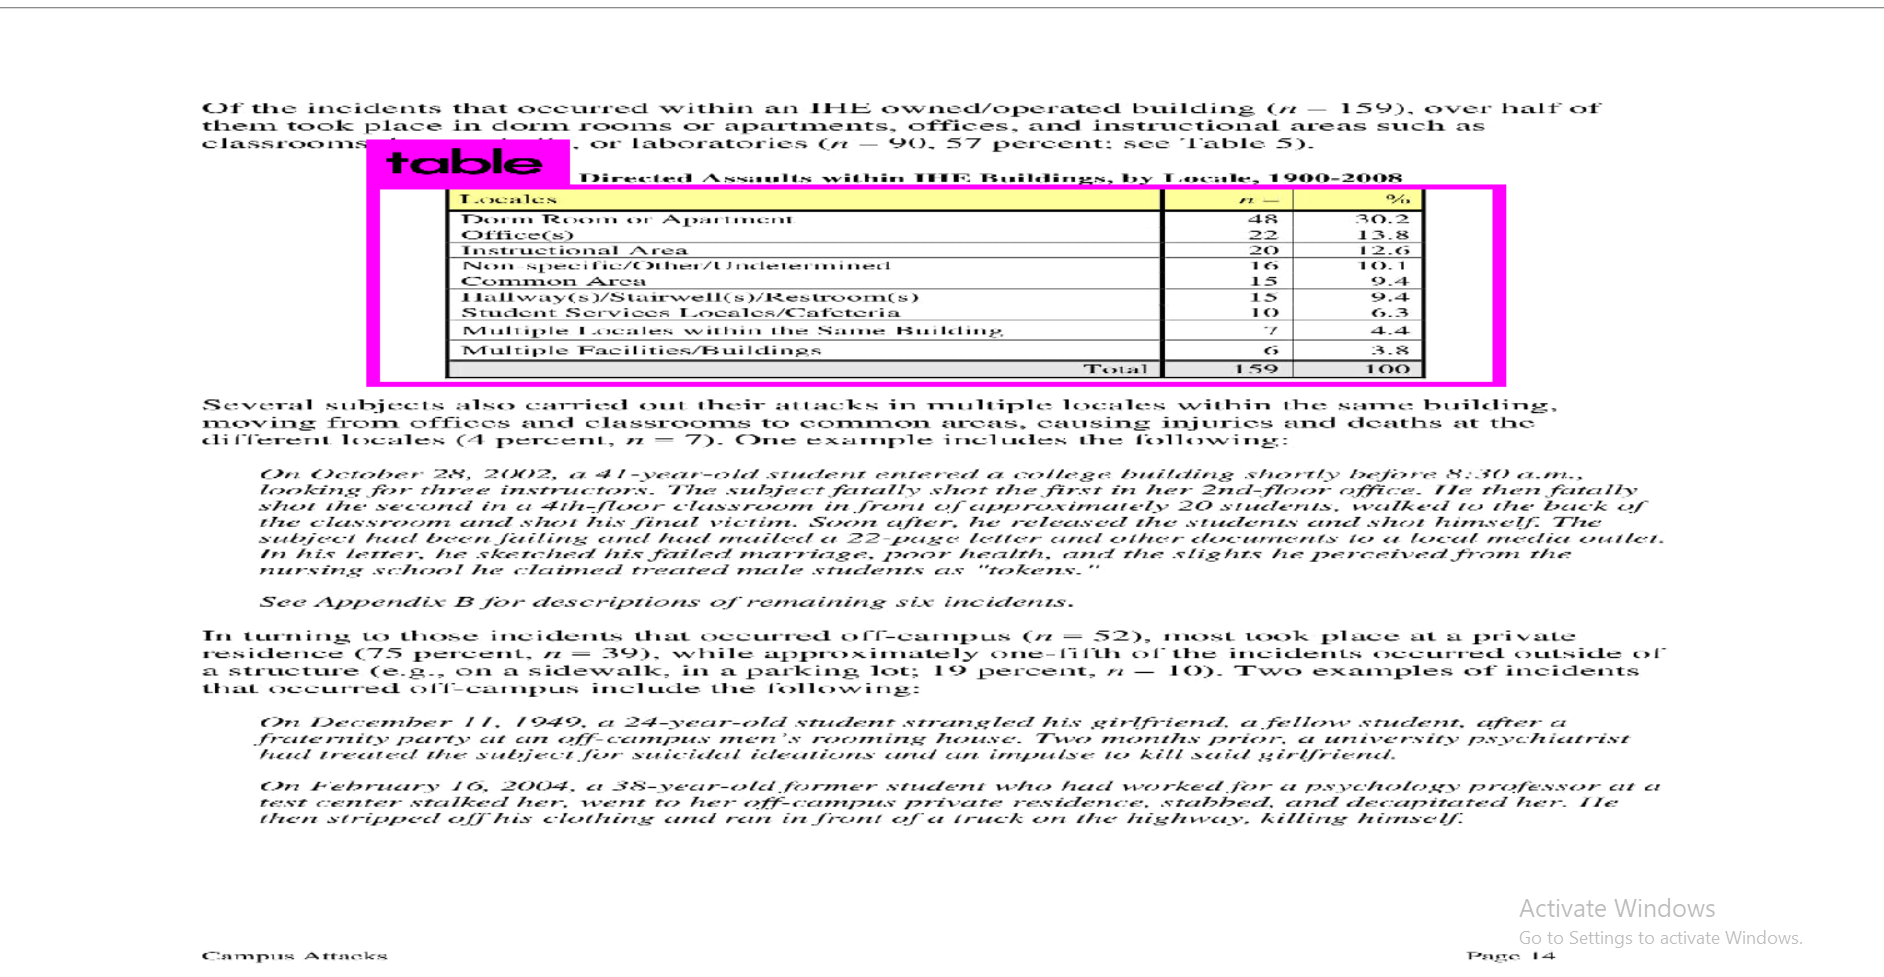

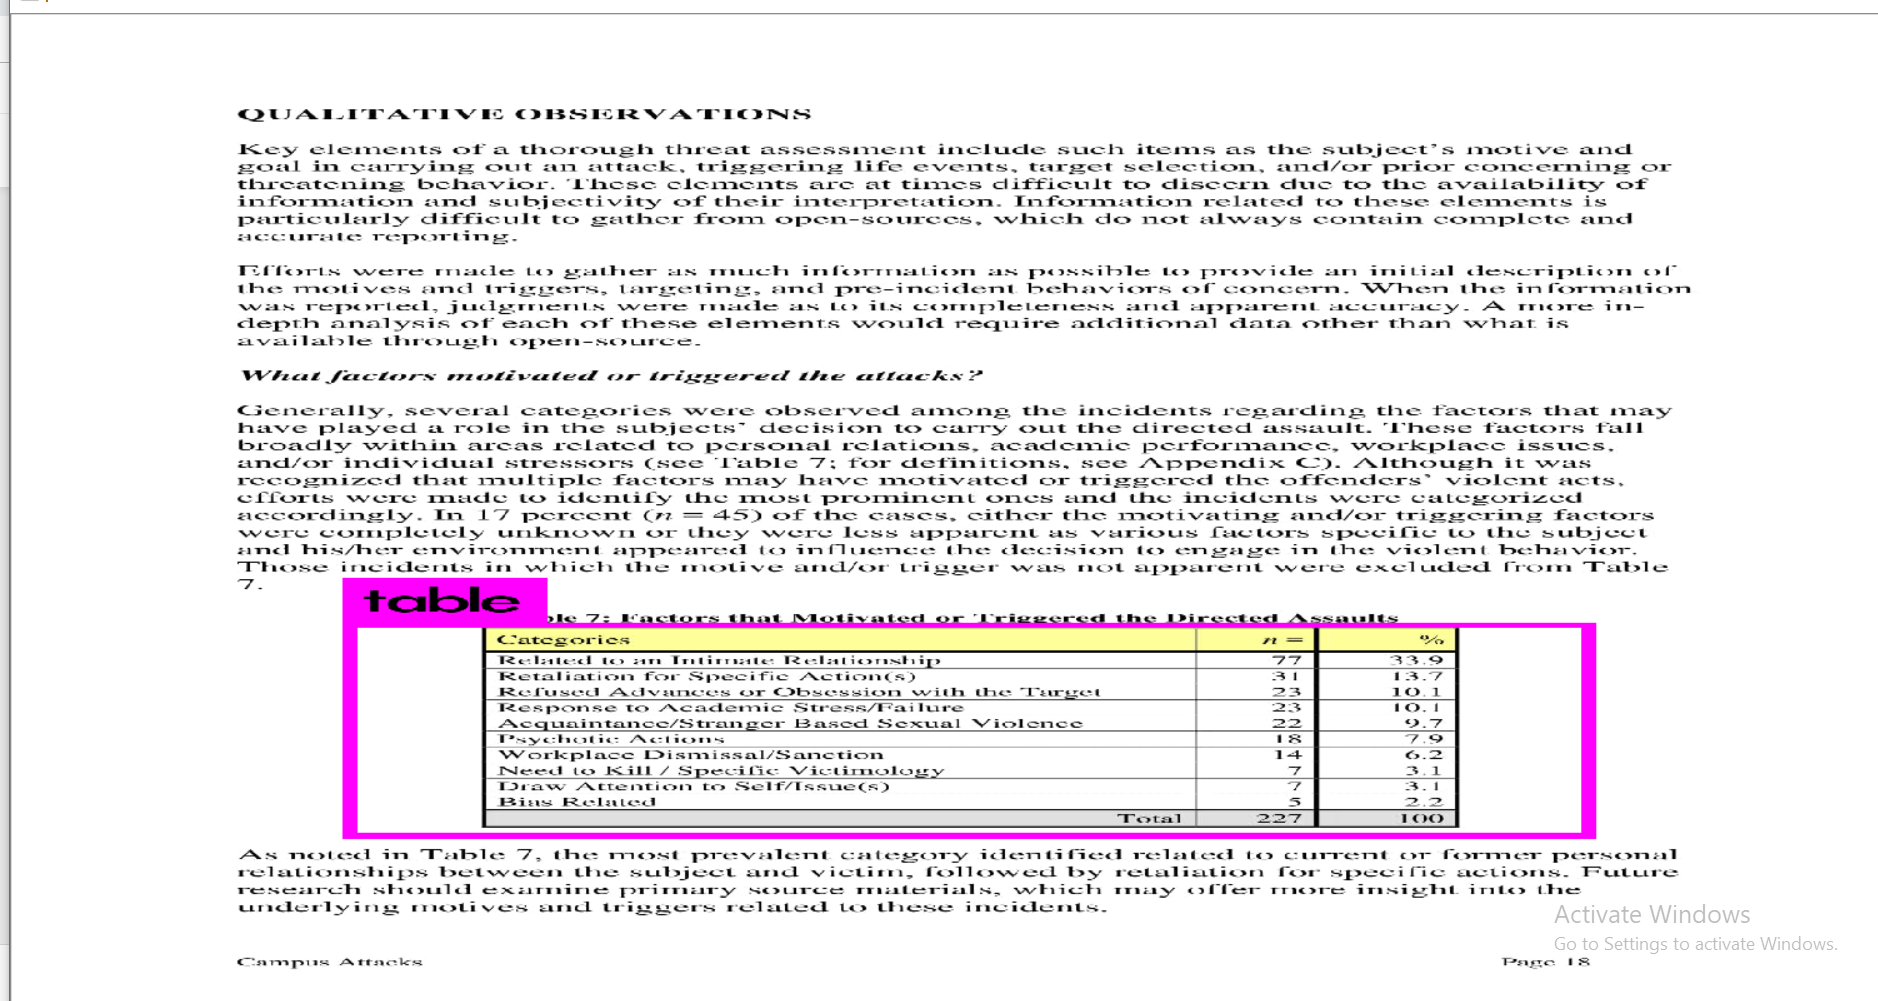

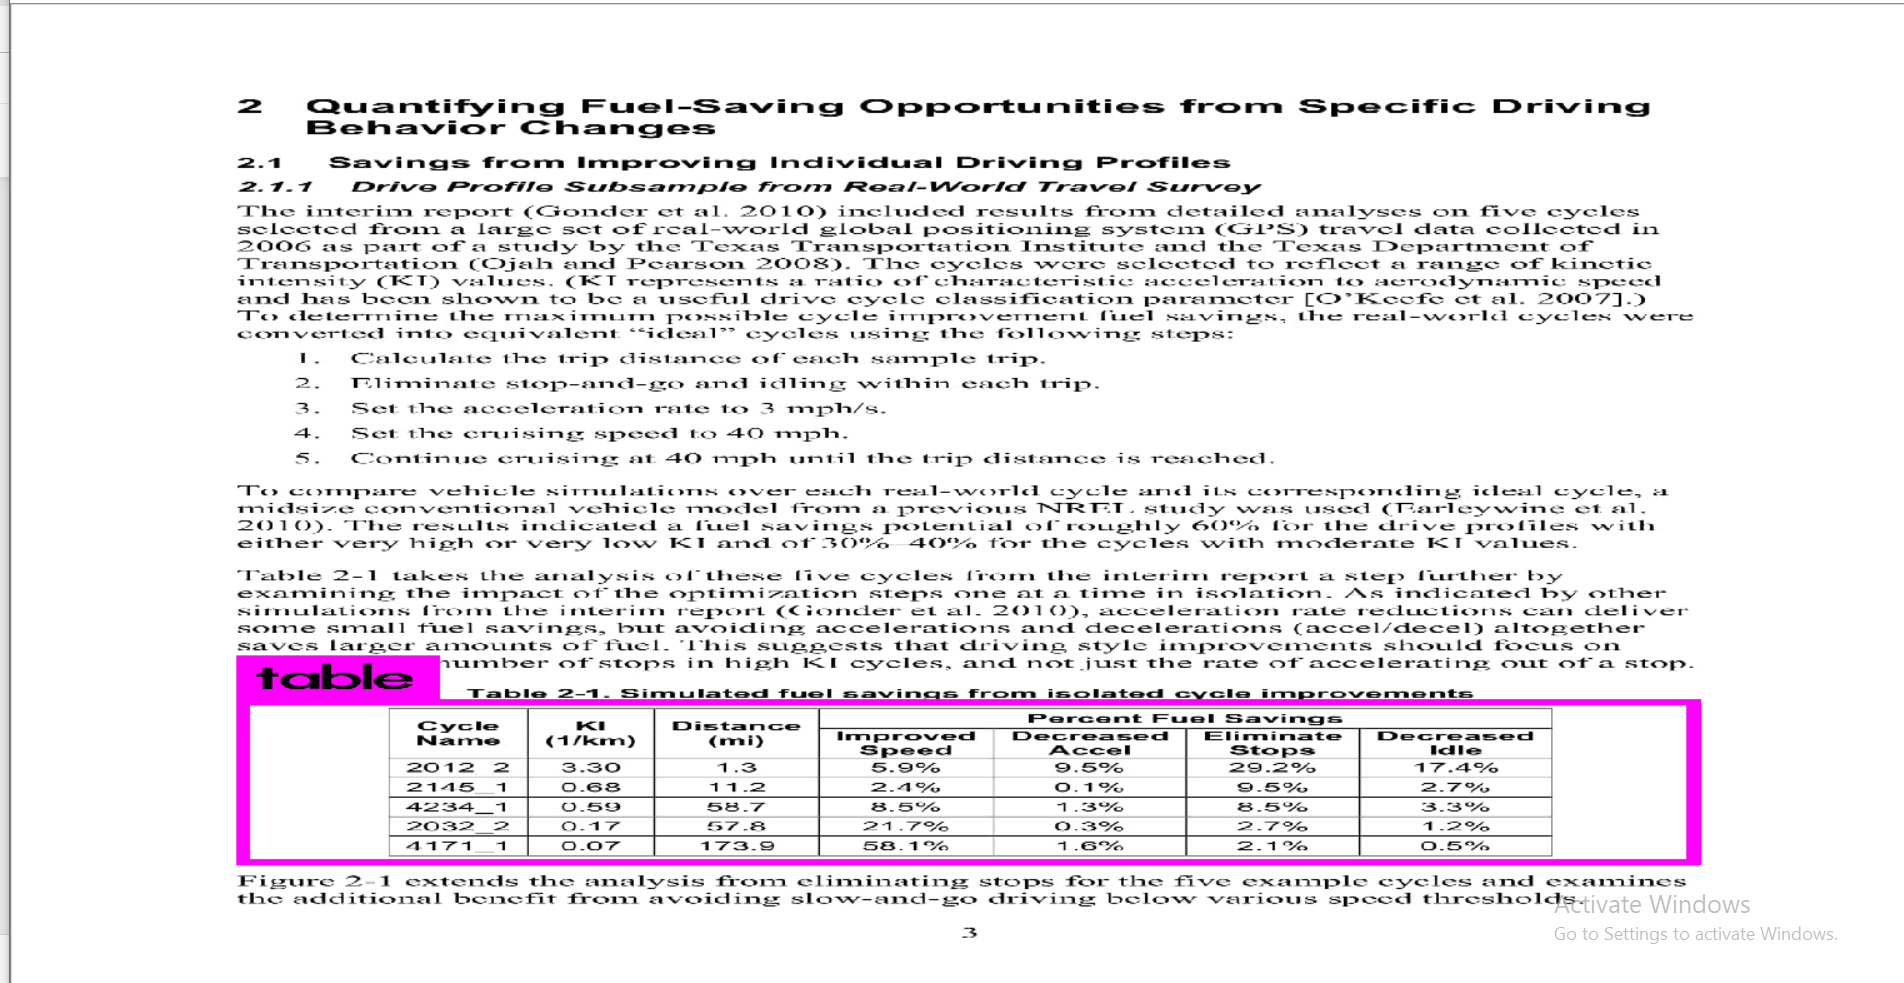

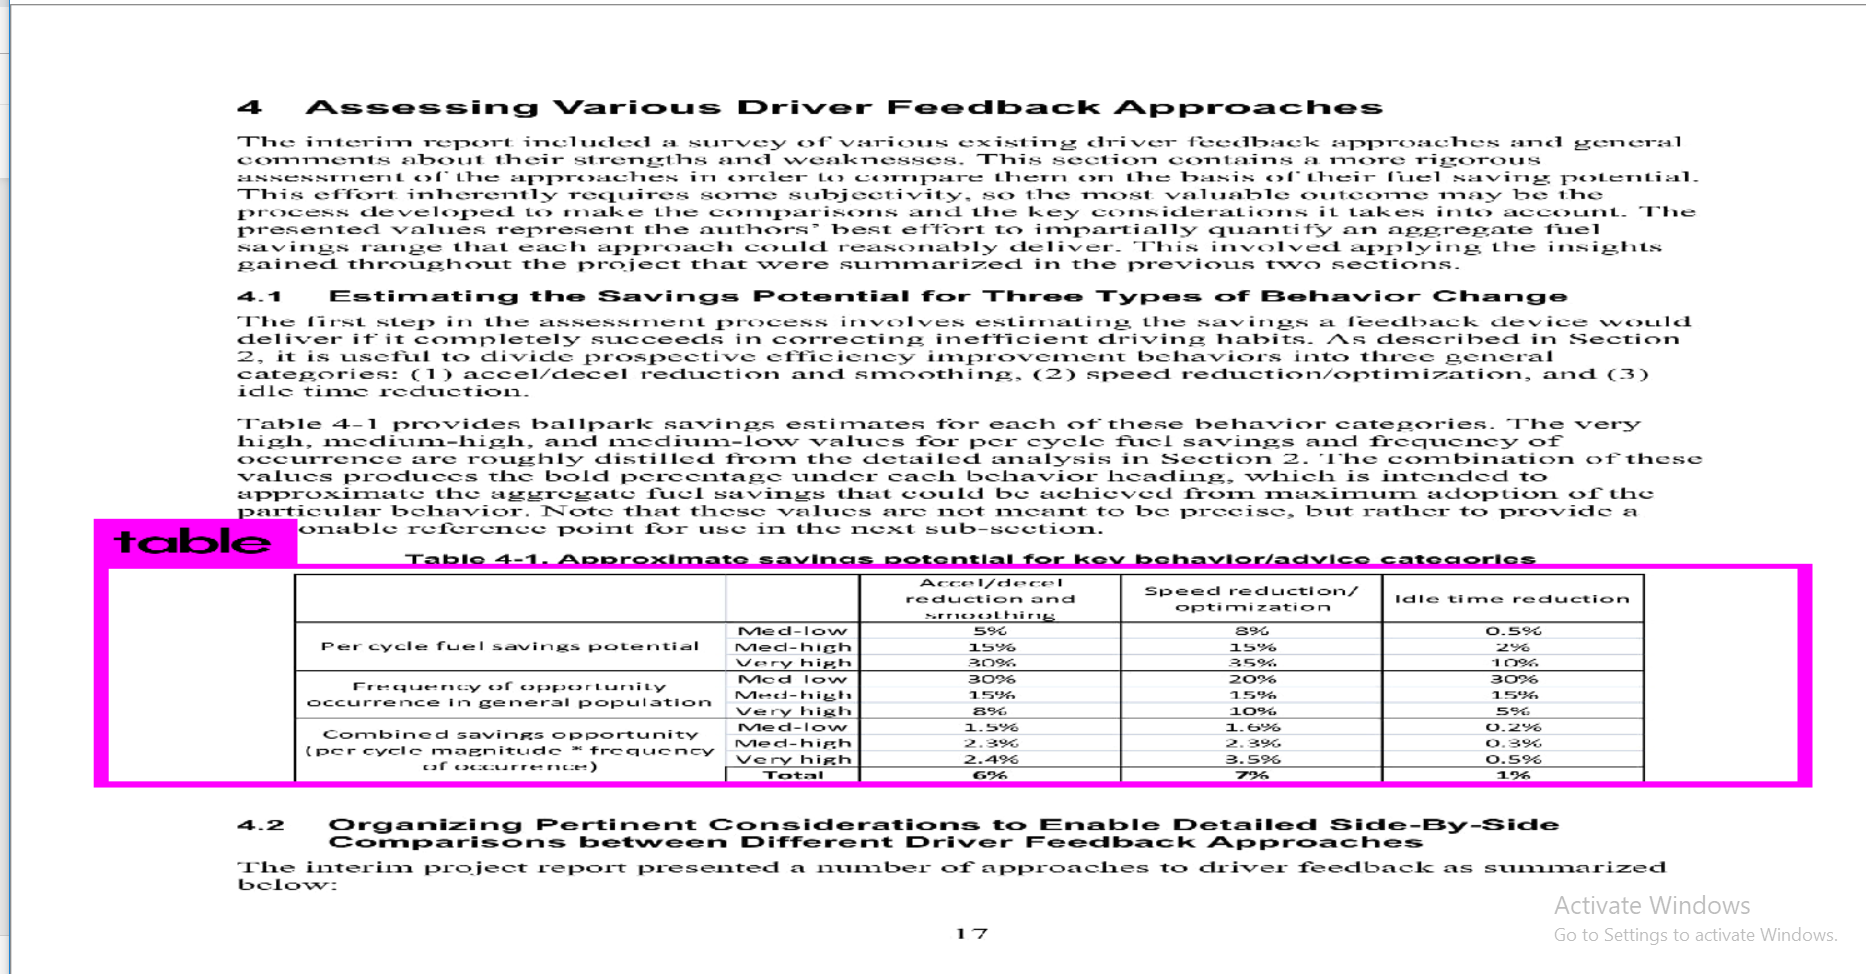

In [84]:
for file in os.listdir('predictions/')[12:]:
    display(Image('predictions/' + file))
    